In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [21]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow import keras
import DNN_softmax_and_SVM
import CNN_softmax_and_SVM
from tensorflow.keras.datasets import mnist

In [38]:
data = pd.read_csv('fer2013.csv')
#check data shape
data.shape

(35887, 3)

In [39]:
#check usage values
#80% training, 10% validation and 10% test
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [40]:
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()


In [41]:
def split_data(df):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
    data_X = np.array(df['pixels'].tolist(), dtype='float32')/255.0   
    data_Y = df['emotion']
    return data_X, data_Y

    
x_train, y_train = split_data(data_train) #training data
x_test, y_test   = split_data(data_test) #test data

In [42]:
x_train.shape

(28709, 2304)

In [43]:
y_train.shape

(28709,)

In [44]:
x_test.shape

(3589, 2304)

In [45]:
y_test.shape

(3589,)

In [34]:
model = DNN_softmax_and_SVM.DNN_SVM(num_classes = 7,  
                    num_input = 48*48,    
                    n_hidden_1 = 512,  
                    n_hidden_2 = 512,
                   )
step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            optimizer = tf.optimizers.Adam(learning_rate = 0.001),
                                            training_steps = 200*75, 
                                            display_step = 100, 
                                            batch_size = 200, 
                                          )



step: 100, loss: 3393.012695, accuracy: 0.260000
step: 200, loss: 3345.894531, accuracy: 0.345000
step: 300, loss: 3328.933838, accuracy: 0.300000
step: 400, loss: 3258.591309, accuracy: 0.350000
step: 500, loss: 3298.583740, accuracy: 0.320000
step: 600, loss: 3276.961914, accuracy: 0.390000
step: 700, loss: 3247.902344, accuracy: 0.400000
step: 800, loss: 3301.321045, accuracy: 0.365000
step: 900, loss: 3258.862793, accuracy: 0.370000
step: 1000, loss: 3293.364746, accuracy: 0.370000
step: 1100, loss: 3227.035889, accuracy: 0.410000
step: 1200, loss: 3268.025635, accuracy: 0.370000
step: 1300, loss: 3273.940430, accuracy: 0.370000
step: 1400, loss: 3165.484619, accuracy: 0.440000
step: 1500, loss: 3217.819580, accuracy: 0.425000
step: 1600, loss: 3229.506348, accuracy: 0.405000
step: 1700, loss: 3250.183594, accuracy: 0.350000
step: 1800, loss: 3241.497803, accuracy: 0.390000
step: 1900, loss: 3253.758789, accuracy: 0.405000
step: 2000, loss: 3244.259766, accuracy: 0.400000
step: 210

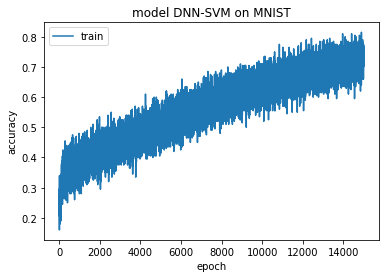

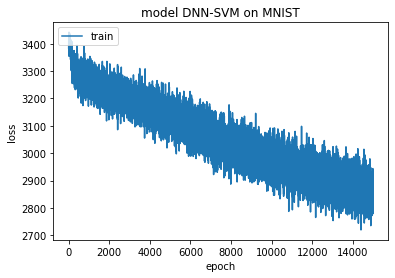

The accuracy of DNN-SVM on the testset is 0.41989412903785706


In [35]:
plt.plot(step_list, acc_list )
plt.title(f'model {model.name} on MNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(step_list, loss_list )
plt.title(f'model {model.name} on MNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(x_test,y_test)

In [18]:
x_train.shape

(28709, 2304)

In [ ]:
model = DNN_softmax_and_SVM.DNN_SVM(num_classes = 7,  
                    num_input = 48*48,    
                    n_hidden_1 = 512,  
                    n_hidden_2 = 512,
                   )
step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            optimizer = tf.optimizers.Adam(learning_rate = 0.001),
                                            training_steps = 200*75, 
                                            display_step = 100, 
                                            batch_size = 200, 
                                          )



In [55]:
y_train = np.array(y_train,dtype = 'uint8')
y_train = np.array([[i] for i in y_train])
y_test = np.array(y_test,dtype = 'uint8')
y_test = np.array([[i] for i in y_test])

step: 10, loss: 174.361267, accuracy: 0.260000
step: 20, loss: 168.035675, accuracy: 0.290000
step: 30, loss: 164.875702, accuracy: 0.340000
step: 40, loss: 167.700043, accuracy: 0.340000
step: 50, loss: 180.946732, accuracy: 0.210000
step: 60, loss: 161.564041, accuracy: 0.420000
step: 70, loss: 150.204330, accuracy: 0.390000
step: 80, loss: 149.662582, accuracy: 0.360000
step: 90, loss: 159.032837, accuracy: 0.510000
step: 100, loss: 160.907547, accuracy: 0.360000
step: 110, loss: 144.958710, accuracy: 0.400000
step: 120, loss: 146.779800, accuracy: 0.460000
step: 130, loss: 139.180542, accuracy: 0.510000
step: 140, loss: 139.652313, accuracy: 0.530000
step: 150, loss: 136.978851, accuracy: 0.540000
step: 160, loss: 141.783478, accuracy: 0.400000
step: 170, loss: 146.539352, accuracy: 0.450000
step: 180, loss: 134.021790, accuracy: 0.500000
step: 190, loss: 132.779907, accuracy: 0.530000
step: 200, loss: 147.724533, accuracy: 0.480000
step: 210, loss: 140.803070, accuracy: 0.470000
s

step: 1740, loss: 3.275908, accuracy: 1.000000
step: 1750, loss: 2.957320, accuracy: 1.000000
step: 1760, loss: 4.131349, accuracy: 1.000000
step: 1770, loss: 4.694615, accuracy: 0.990000
step: 1780, loss: 3.865839, accuracy: 1.000000
step: 1790, loss: 5.222460, accuracy: 0.990000
step: 1800, loss: 5.058526, accuracy: 1.000000
step: 1810, loss: 5.861394, accuracy: 0.990000
step: 1820, loss: 2.649129, accuracy: 1.000000
step: 1830, loss: 5.932885, accuracy: 0.990000
step: 1840, loss: 2.862286, accuracy: 1.000000
step: 1850, loss: 5.702382, accuracy: 1.000000
step: 1860, loss: 4.080287, accuracy: 1.000000
step: 1870, loss: 2.120552, accuracy: 1.000000
step: 1880, loss: 1.843454, accuracy: 1.000000
step: 1890, loss: 2.872551, accuracy: 1.000000
step: 1900, loss: 9.526365, accuracy: 0.980000
step: 1910, loss: 2.457129, accuracy: 1.000000
step: 1920, loss: 2.986306, accuracy: 1.000000
step: 1930, loss: 5.460475, accuracy: 0.990000
step: 1940, loss: 7.204552, accuracy: 0.970000
step: 1950, l

step: 3490, loss: 0.224042, accuracy: 1.000000
step: 3500, loss: 0.230320, accuracy: 1.000000
step: 3510, loss: 0.232374, accuracy: 1.000000
step: 3520, loss: 0.546315, accuracy: 1.000000
step: 3530, loss: 0.176111, accuracy: 1.000000
step: 3540, loss: 0.768927, accuracy: 1.000000
step: 3550, loss: 3.547834, accuracy: 0.990000
step: 3560, loss: 0.159281, accuracy: 1.000000
step: 3570, loss: 0.570320, accuracy: 1.000000
step: 3580, loss: 0.120079, accuracy: 1.000000
step: 3590, loss: 1.094819, accuracy: 0.990000
step: 3600, loss: 0.158072, accuracy: 1.000000
step: 3610, loss: 0.924054, accuracy: 1.000000
step: 3620, loss: 4.068139, accuracy: 0.990000
step: 3630, loss: 0.065288, accuracy: 1.000000
step: 3640, loss: 1.095607, accuracy: 1.000000
step: 3650, loss: 0.281173, accuracy: 1.000000
step: 3660, loss: 1.724602, accuracy: 0.990000
step: 3670, loss: 0.261508, accuracy: 1.000000
step: 3680, loss: 0.210269, accuracy: 1.000000
step: 3690, loss: 0.558681, accuracy: 1.000000
step: 3700, l

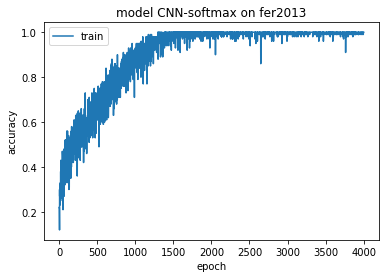

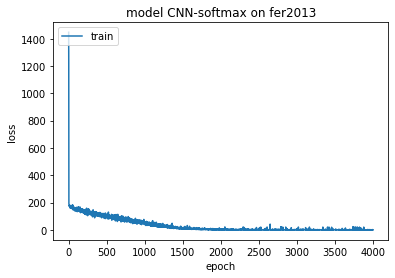

The accuracy of CNN-softmax on the testset is 0.5419337153434753


In [58]:
model = CNN_softmax_and_SVM.CNN_softmax( num_classes = 7, 
                     conv1_filters = 32, # number of filters for 1st conv layer.
                     conv2_filters = 64, # number of filters for 2nd conv layer.
                     fc1_units = 3072, # number of neurons for 1st fully-connected layer.
                     kernel_len = 5)

step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            image_width = 48, 
                                            optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
                                            training_steps = 4000, 
                                            display_step = 10 , 
                                            batch_size = 100,
                                            pooling_merge_number = 2, 
                                            dropout_rate = 0.2,
                                            channels = 1,)
CNN_softmax_and_SVM.draw( datasetname = "fer2013",modelname = model.name, 
                         step_list = step_list, acc_list = acc_list, loss_list = loss_list)
model.evaluate(x_test,tf.transpose(y_test)[0])

step: 10, loss: 400.888611, accuracy: 0.240000
step: 20, loss: 383.022614, accuracy: 0.310000
step: 30, loss: 369.943054, accuracy: 0.360000
step: 40, loss: 420.159546, accuracy: 0.260000
step: 50, loss: 369.296204, accuracy: 0.350000
step: 60, loss: 337.116943, accuracy: 0.420000
step: 70, loss: 362.614044, accuracy: 0.310000
step: 80, loss: 355.948456, accuracy: 0.400000
step: 90, loss: 346.706909, accuracy: 0.390000
step: 100, loss: 365.143311, accuracy: 0.390000
step: 110, loss: 307.700256, accuracy: 0.450000
step: 120, loss: 323.492493, accuracy: 0.440000
step: 130, loss: 363.009033, accuracy: 0.250000
step: 140, loss: 330.508453, accuracy: 0.430000
step: 150, loss: 333.187988, accuracy: 0.390000
step: 160, loss: 323.099091, accuracy: 0.390000
step: 170, loss: 327.855133, accuracy: 0.430000
step: 180, loss: 342.695984, accuracy: 0.410000
step: 190, loss: 324.442993, accuracy: 0.380000
step: 200, loss: 312.181305, accuracy: 0.380000
step: 210, loss: 317.632385, accuracy: 0.360000
s

step: 1710, loss: 55.502762, accuracy: 0.980000
step: 1720, loss: 69.688080, accuracy: 0.970000
step: 1730, loss: 58.230656, accuracy: 0.980000
step: 1740, loss: 52.450016, accuracy: 1.000000
step: 1750, loss: 53.005531, accuracy: 0.980000
step: 1760, loss: 53.984936, accuracy: 0.990000
step: 1770, loss: 46.235542, accuracy: 0.980000
step: 1780, loss: 69.318413, accuracy: 0.960000
step: 1790, loss: 52.191319, accuracy: 0.970000
step: 1800, loss: 62.372871, accuracy: 0.960000
step: 1810, loss: 58.695862, accuracy: 0.960000
step: 1820, loss: 49.134079, accuracy: 0.970000
step: 1830, loss: 54.139637, accuracy: 1.000000
step: 1840, loss: 41.795601, accuracy: 1.000000
step: 1850, loss: 48.471821, accuracy: 0.980000
step: 1860, loss: 46.336708, accuracy: 1.000000
step: 1870, loss: 39.531982, accuracy: 0.990000
step: 1880, loss: 92.594223, accuracy: 0.920000
step: 1890, loss: 50.489010, accuracy: 0.990000
step: 1900, loss: 46.045517, accuracy: 1.000000
step: 1910, loss: 49.140858, accuracy: 0

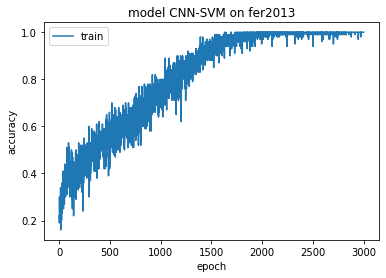

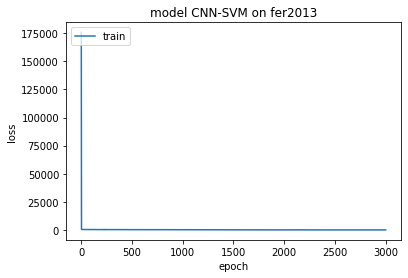

The accuracy of CNN-SVM on the testset is 0.5494566559791565


In [62]:
model_SVM_FER = CNN_softmax_and_SVM.CNN_SVM( num_classes = 7, 
                     conv1_filters = 32, # number of filters for 1st conv layer.
                     conv2_filters = 64, # number of filters for 2nd conv layer.
                     fc1_units = 3072, # number of neurons for 1st fully-connected layer.
                     kernel_len = 5)

step_list, loss_list, acc_list = model_SVM_FER.fit( x_train, y_train, 
                                            image_width = 48, 
                                            optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
                                            training_steps = 3000, 
                                            display_step = 10 , 
                                            batch_size = 100,
                                            pooling_merge_number = 2, 
                                            dropout_rate = 0.4,
                                            channels = 1,)
CNN_softmax_and_SVM.draw( datasetname = "fer2013",modelname = model_SVM_FER.name, 
                         step_list = step_list, acc_list = acc_list, loss_list = loss_list)
model_SVM_FER.evaluate(x_test,tf.transpose(y_test)[0])